# Transfer learning
Taking the ANN model and freezing the last layer for even-odd

## New problem statement -
Classify handwritten digits into odd and even

In [ ]:
pretrained_model = tf.keras.models.load_model("mnist_full.h5")

In [ ]:
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## checking the layers which are trainable
for layer in pretrained_model.layers:
    print(f"{layer.name}: {layer.trainable}")

inputLayer: True
hiddenLayer01: True
hiddenLayer02: True
outputLayer: True


In [ ]:
## dont want all the layers to train again except the last one i.e output layer
for layer in pretrained_model.layers[:-1]: # leave the last layer
    layer.trainable = False

In [ ]:
## again checking all the layers after making above false
for layer in pretrained_model.layers:
    print(f"{layer.name}: {layer.trainable}")

inputLayer: False
hiddenLayer01: False
hiddenLayer02: False
outputLayer: True


In [ ]:
lower_pretrained_model = pretrained_model.layers[:-1]

In [ ]:
## adding last layer to train
new_model = tf.keras.models.Sequential(lower_pretrained_model)
new_model.add(
    tf.keras.layers.Dense(2, activation="softmax")
)

In [ ]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 265802 (1.01 MB)
Trainable params: 202 (808.00 Byte)
Non-trainable params: 265600 (1.01 MB)
_________________________________________________________________


In [ ]:
100*2 + 2

202

In [ ]:
def update_even_odd_labels(labels):
    for idx, label in enumerate(labels):
        labels[idx] = np.where(label%2 == 0, 1, 0) # 1 -> even, 0 -> odd
    return labels

In [ ]:
y_train_bin, y_test_bin, y_valid_bin = update_even_odd_labels([y_train, y_test, y_valid])

In [ ]:
np.unique(y_train_bin)

array([0, 1])

In [ ]:
new_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="SGD",
                  metrics=["accuracy"]
                  )

In [ ]:
history = new_model.fit(
    X_train, y_train_bin, epochs=10, validation_data = (X_valid, y_valid_bin)
)

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1661 - accuracy: 0.9427 - val_loss: 0.1197 - val_accuracy: 0.9582
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1138 - accuracy: 0.9619 - val_loss: 0.1076 - val_accuracy: 0.9626
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1047 - accuracy: 0.9646 - val_loss: 0.1039 - val_accuracy: 0.9646
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1000 - accuracy: 0.9663 - val_loss: 0.0987 - val_accuracy: 0.9652
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0970 - accuracy: 0.9670 - val_loss: 0.0973 - val_accuracy: 0.9652
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0949 - accuracy: 0.9681 - val_loss: 0.0958 - val_accuracy: 0.9662
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0933 - accuracy: 0.9683 - val_loss: 0.0953 - val_accuracy:

In [ ]:
new_model.evaluate(X_test, y_test_bin)

313/313 [==============================] - 1s 2ms/step - loss: 0.0968 - accuracy: 0.9672


[0.09677328169345856, 0.967199981212616]

In [ ]:
X_new = X_test[:3]

y_prob = new_model.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 52ms/step


array([[1.   , 0.   ],
       [0.001, 0.999],
       [0.971, 0.029]], dtype=float32)

In [ ]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([0, 1, 0])

In [ ]:
y_test_bin[:3]

array([0, 1, 0])

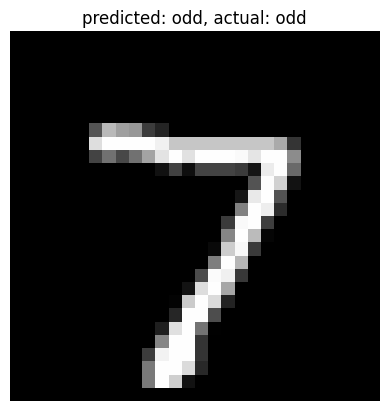

------------------------------------------------------------


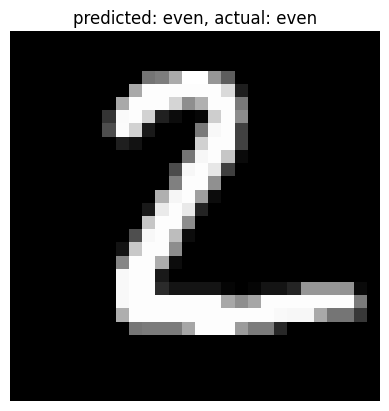

------------------------------------------------------------


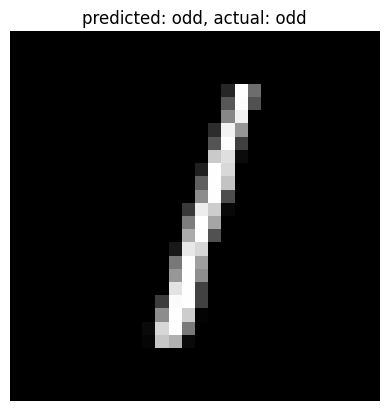

------------------------------------------------------------


In [ ]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test_bin[:3]):
    if pred == 1:
        pred = "even"
    else:
        pred = "odd"

    if actual == 1:
        actual = "even"
    else:
        actual = "odd"
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)